## <div style="text-align: center">Maskinlæring med Python</div>

### <div style="text-align: center">Michael Gfeller, Computasdag 3.2.2018</div>

![Computas](img/logo_blue_small.jpg)


----

_(Notebook basert på https://www.kaggle.com/futurist/pima-data-visualisation-and-machine-learning, [Apache 2.0 license](http://www.apache.org/licenses/LICENSE-2.0))_

# Introduksjon
This notebook demos Data Visualisation and various Machine Learning Classification algorithms on Pima Indians dataset.

In [1]:
# from IPython.display import YouTubeVideo
# YouTubeVideo("pN4HqWRybwk")

# 1. Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Data

In [3]:
pima = pd.read_csv("diabetes.csv") # pandas.core.frame.DataFrame

In [4]:
pima.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [5]:
pima.shape

(768, 9)

In [6]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
pima.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

# Visualisering

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0B0D0A080>,
      dtype=object)

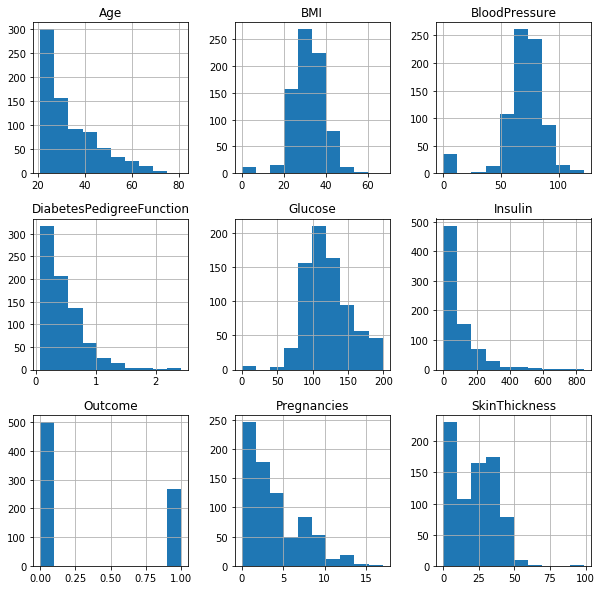

In [8]:
pima.hist(figsize=(10,10))

## Boxplot

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

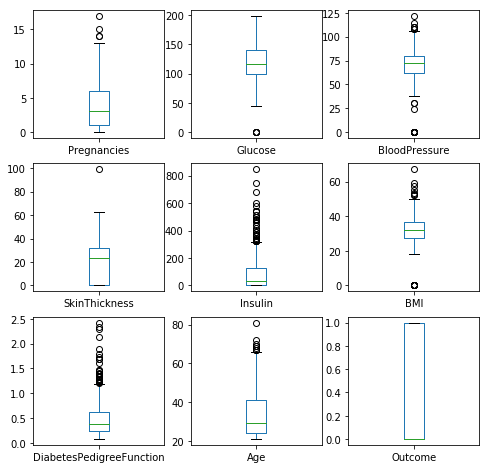

In [9]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,8))

In [10]:
X_columns = pima.columns[0:len(pima.columns) - 1]

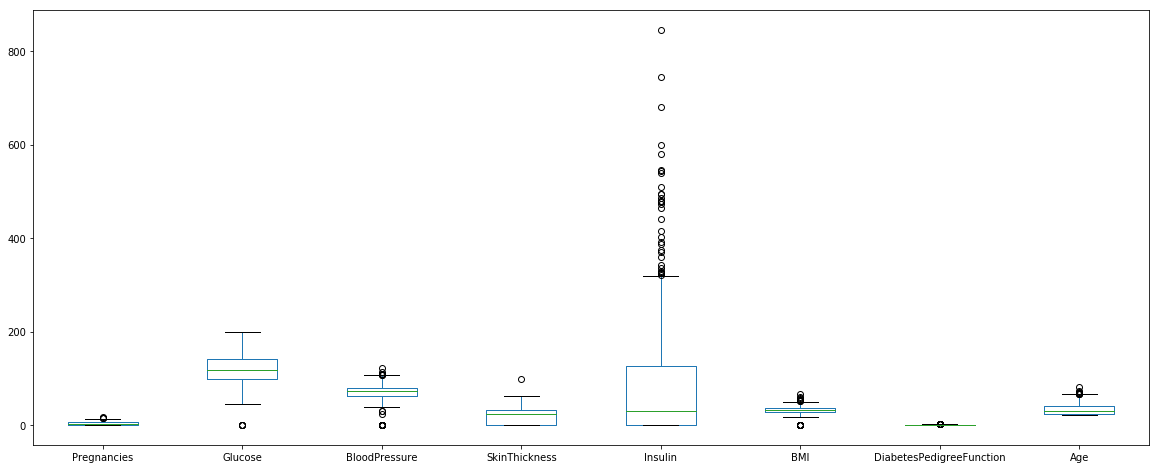

In [11]:
pima[X_columns].plot(kind= 'box', subplots=False, figsize=(20,8))

## Korrelasjon

In [18]:
correlations = pima[pima.columns].corr()

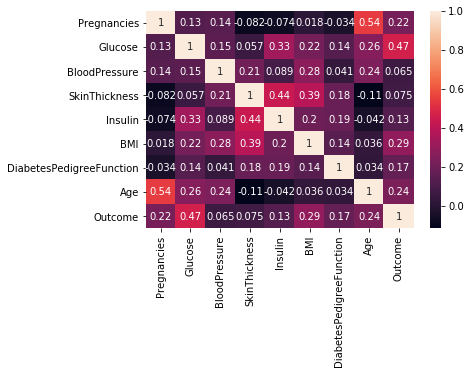

In [19]:
sns.heatmap(correlations, annot = True)

# 4) Feature Extraction

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]
select_top_4 = SelectKBest(score_func=chi2, k = 4)

In [22]:
fit = select_top_4.fit(X,Y)
features = fit.transform(X)

In [23]:
feature_cols = pima.columns[fit.get_support('indices')]
feature_cols

Index(['Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')

In [24]:
features[0:3]

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ]])

In [25]:
pima.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [26]:
X_features = pd.DataFrame(data = features, columns = feature_cols)

In [27]:
X_features.head(3)

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0


#  5) Standardization - Skalering 
It changes the attribute values to Guassian distribution with mean as 0 and standard deviation as 1. It is useful when the algorithm expects the input features to be in Guassian distribution.

__(hmmm....)__

In [28]:
from sklearn.preprocessing import StandardScaler
X_features_scaled = StandardScaler().fit_transform(X_features)

In [29]:
X = pd.DataFrame(data = X_features_scaled, columns= X_features.columns)

In [30]:
X.head(3)

,Glucose,Insulin,BMI,Age
0,0.848324,-0.692891,0.204013,1.425995
1,-1.123396,-0.692891,-0.684422,-0.190672
2,1.943724,-0.692891,-1.103255,-0.105584


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0B2FF2B70>,
      dtype=object)

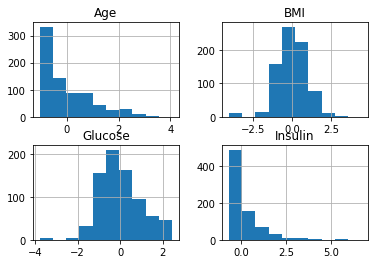

In [31]:
X.hist()

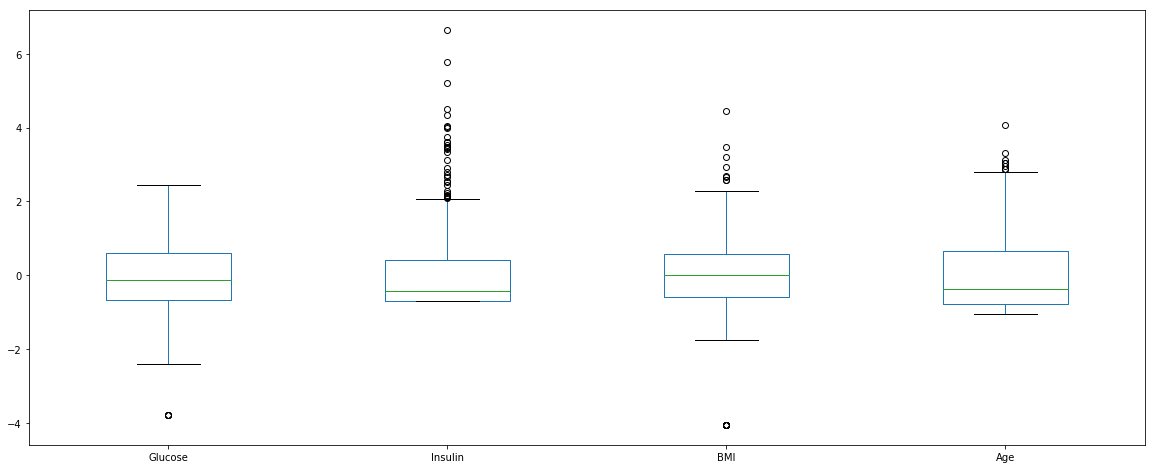

In [32]:
X.plot(kind= 'box', subplots=False, figsize=(20,8))

# 6) Binary Classification

In [33]:
from sklearn.model_selection import train_test_split
random_seed = 22
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = random_seed, test_size = 0.2)

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [35]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

In [36]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=random_seed)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print("%-5s: %.2f%%" % (names[i],results[i].mean()*100))

LR   : 77.69%
NB   : 76.05%
KNN  : 74.59%
DT   : 70.53%
SVM  : 77.69%


# 7) Visualising Results

[Text(0,0,'LR'),
 Text(0,0,'NB'),
 Text(0,0,'KNN'),
 Text(0,0,'DT'),
 Text(0,0,'SVM')]

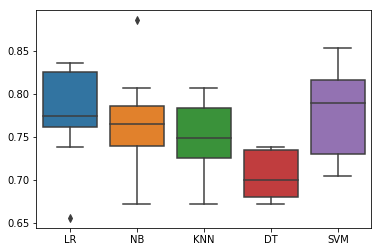

In [40]:
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

# 8) Final Prediction using Test Data
Logistic Regression and SVM provides maximum results.

In [41]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [43]:
print("%-5s: %.2f%%" % ("LR", accuracy_score(Y_test,predictions)*100))

LR   : 71.43%


In [44]:
svm = SVC()
svm.fit(X_train,Y_train)
predictions = svm.predict(X_test)

In [49]:
print("%-5s: %.2f%%" % ("SVM", accuracy_score(Y_test,predictions)*100))

SVM  : 73.38%


In [46]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      0.92      0.82       100
          1       0.72      0.39      0.51        54

avg / total       0.73      0.73      0.71       154



In [105]:
# https://en.wikipedia.org/wiki/Confusion_matrix
confusion = confusion_matrix(Y_test,predictions)
# print(confusion)
tn, fp, fn, tp = confusion.ravel()
total = tn + fp + fn + tp
print("True negatives:  %4d" % tn)
print("True positives:  %4d" % tp)
print("False negatives: %4d" % fn)
print("False positives: %4d" % fp)
print("Accuracy:        %4.0f%%" % (100*(tp+tn)/total))
print("Precision:       %4.0f%%" % (100*tp/(tp+fp)))
print("Recall:          %4.0f%%" % (100*tp/(tp+fn)))

True negatives:    92
True positives:    21
False negatives:   33
False positives:    8
Accuracy:          73%
Precision:         72%
Recall:            39%
